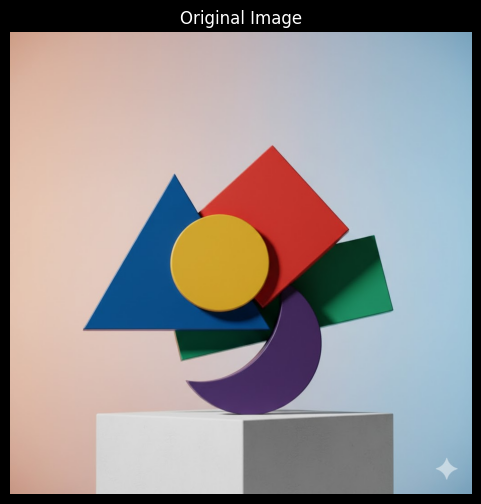

Original image shape: (1024, 1024, 3)
K-Means input shape (Total Pixels, RGB): (1048576, 3)


In [1]:
# import necessary libraries
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# define constants & parameters
IMAGE_SRC_NAME = 'easy_challenge.png'
IMAGE_SRC_FOLDER_PATH = 'images/source/'
IMAGE_SRC_PATH = IMAGE_SRC_FOLDER_PATH + IMAGE_SRC_NAME
IMAGE_OUTPUT_FOLDER_PATH = 'images/output/'
K = 5  # number of colors in the palette

# load image
try:
    img = Image.open(IMAGE_SRC_PATH)
except FileNotFoundError:
    print(f"Error: The image at path {IMAGE_SRC_PATH} was not found.")
    exit()

# use dark mode
plt.style.use('dark_background')

# display original image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# convert image to numpy array
img_array = np.array(img)

# reshape image to a 2D array of pixels
# -1: infers number of rows, 3: RGB channels
pixels = img_array.reshape(-1, 3)

print(f"Original image shape: {img_array.shape}")
print(f"K-Means input shape (Total Pixels, RGB): {pixels.shape}")

In [2]:
# initialize and train K-Means model
print(f"\nTraining K-Means with K={K}...")
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(pixels)
print("K-Means training completed.")

dominant_colors = kmeans.cluster_centers_.astype(int)
print(f"\n--- Model Output ---")
print("Dominant Colors (RGB):")
print(dominant_colors)


Training K-Means with K=5...
K-Means training completed.

--- Model Output ---
Dominant Colors (RGB):
[[216 192 183]
 [117 117 118]
 [198 101  43]
 [ 29  60  87]
 [168 191 208]]


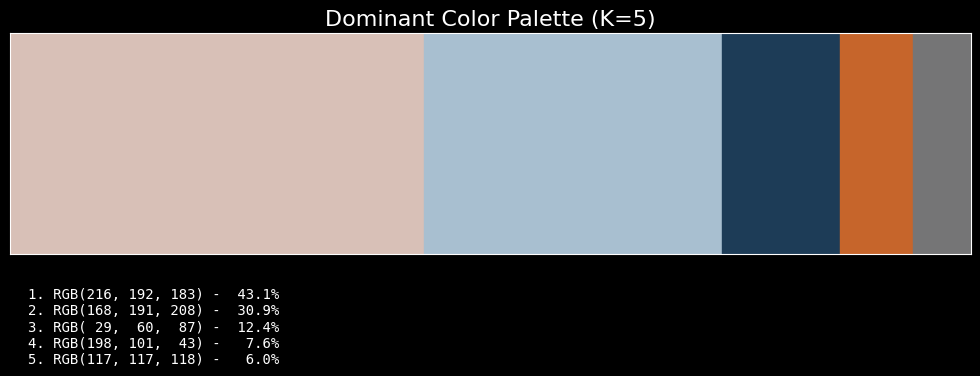

In [ ]:
# function to convert RGB to the 0-1 range for matplotlib
def rgb_to_mpl_color(rgb_tuple):
    return tuple(c / 255.0 for c in rgb_tuple)

# create figure to display dominant colors
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# weigh the colors by frequency
labels = kmeans.labels_
unique_labels, counts = np.unique(labels, return_counts=True)

# create color-proportion pairs
color_proportions = []
for label in unique_labels:
    color = kmeans.cluster_centers_[label].astype(int)
    proportion = counts[label] / len(pixels)
    color_proportions.append((color, proportion))

# sort by proportion, descending
color_proportions.sort(key=lambda x: x[1], reverse=True)

# draw the color palette
start = 0
for color, prop in color_proportions:
    end = start + prop
    # draw colored rectangle for current color
    ax.axvspan(start, end, color=rgb_to_mpl_color(color), ymin=0, ymax=1.0, alpha=1)
    start = end

# Add RGB values as list below the palette
text_lines = []
for i, (color, prop) in enumerate(color_proportions):
    text_lines.append(f"{i+1}. RGB({color[0]:3d}, {color[1]:3d}, {color[2]:3d}) - {prop*100:5.1f}%")

text_str = "\n".join(text_lines)
ax.text(0.15, -0.15, text_str, ha='center', va='top', 
        fontsize=10, color='white', transform=ax.transAxes,
        family='monospace')

ax.set_title(f'Dominant Color Palette (K={K})', fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 1)  # set limits from 0 to 1 for proper display of proportions
ax.set_ylim(0, 1)
plt.tight_layout()
plt.savefig(f'{IMAGE_OUTPUT_FOLDER_PATH}/color_palette_{IMAGE_SRC_NAME.split(".")[0]}.png')
# if you want to update display image for README:
# plt.savefig(f'showcase_palette_output.png')
plt.show()